In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame
x,_=make_blobs(n_samples=500,centers=3,n_features=2,random_state=20)

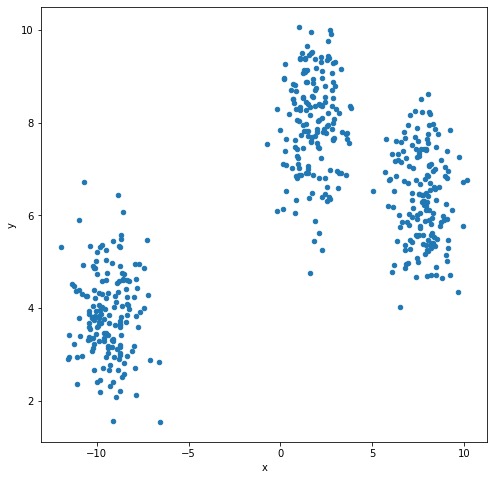

In [2]:
df=DataFrame(dict(x=x[:,0], y=x[:,1]))
fig,ax=plt.subplots(figsize=(8,8))
df.plot(ax=ax,kind='scatter', x='x',y='y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
from sklearn.cluster import DBSCAN
clustering=DBSCAN(eps=1,min_samples=5).fit(x)
cluster=clustering.labels_

In [4]:
len(set(cluster))

4

In [5]:
def show_cluster(x, cluster):
    df=DataFrame(dict(x=x[:,0], y=x[:,1],label=cluster))
    colors={-1:'red',0:'blue',1:'green',2:'orange'}
    fig,ax=plt.subplots(figsize=(8,8))
    grouped=df.groupby('label')
    for key,group in grouped:
        group.plot(ax=ax,kind='scatter', x='x',y='y',label=key,color=colors[key])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

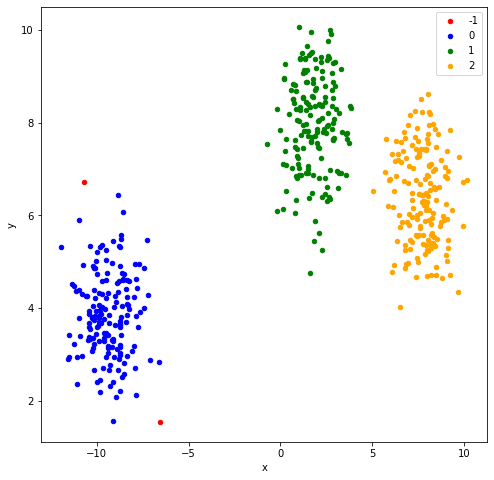

In [6]:
show_cluster(x, cluster)

# hierarchy_algorithm

In [7]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

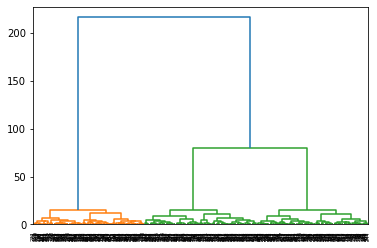

In [8]:
dendogram=sch.dendrogram(sch.linkage(x,method='ward'))

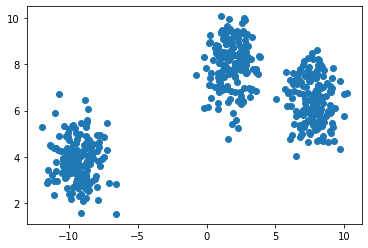

In [9]:
plt.scatter(x[:,0],x[:,1])

In [10]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [11]:
y_hc=hc.fit_predict(x)

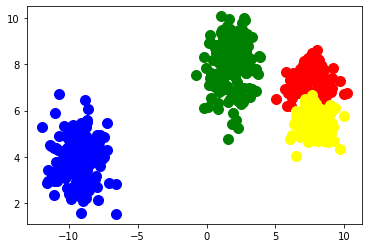

In [12]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='blue')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='red')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='green')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c='yellow')